In [ ]:
dir_raiz = '/content/drive/MyDrive/- Cañengo -/- igac -/2023/Celula Automata/19050 - Argelia/Datasets/condicionado/'

In [ ]:
semilla = 54321

In [ ]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from datetime import datetime

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import BernoulliNB #XXXXXXXXXXXXXXXX

# Clasificadores Uno Vs. Resto
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
# Visualizaciones
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

In [ ]:
X_train = pd.read_csv( dir_raiz + 'train/X.csv', header=None)
y_train = pd.read_csv( dir_raiz + 'train/y.csv', header=None)[0].map(str)

In [ ]:
X_test = pd.read_csv( dir_raiz + 'test/X.csv', header=None)
y_test = pd.read_csv( dir_raiz + 'test/y.csv', header=None)[0].map(str)

In [ ]:
X_train.shape

(2754282, 48)

In [ ]:
X_test.shape

(688809, 48)

In [ ]:
y_train.shape

(2754282,)

In [ ]:
y_test.shape

(688809,)

In [ ]:
clf = OneVsRestClassifier(BernoulliNB()) #XXXXXXXXXXXXXXXX

print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") )
clf.fit(X_train, y_train)
print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") )

13/05/2023 02:37:32
13/05/2023 02:38:12


In [ ]:
print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") )
y_pred = clf.predict(X_test)
print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") )

13/05/2023 02:38:12
13/05/2023 02:38:19


In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.4944752464035749

In [ ]:
con_mat = metrics.confusion_matrix(y_test, y_pred)

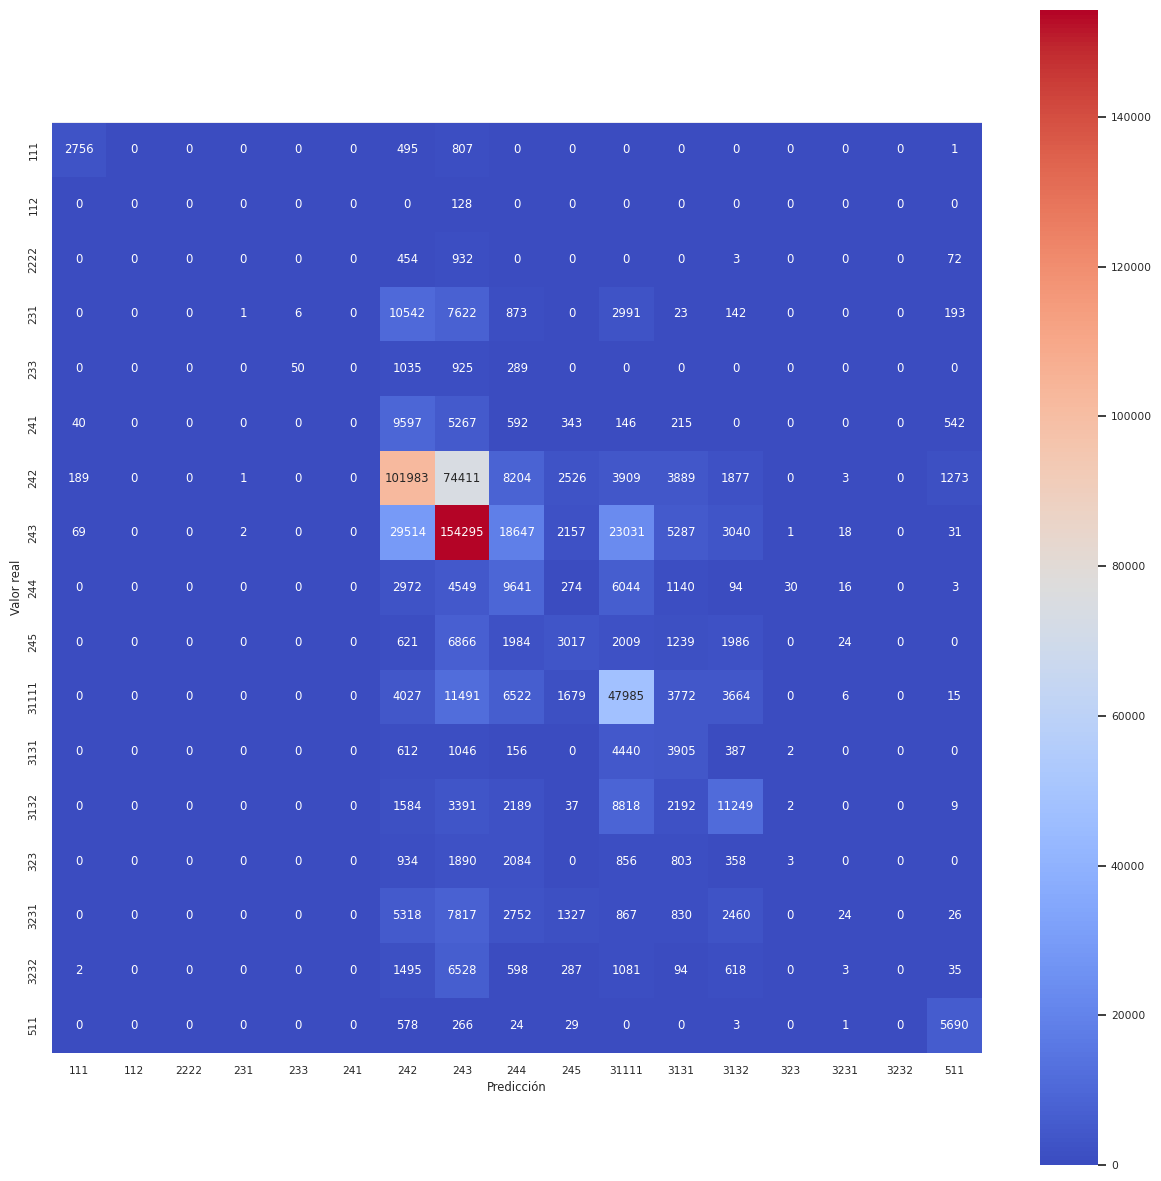

In [ ]:
sns.set (rc={'figure.figsize':(15,15)}, font_scale=0.7)
y_labels=clf.classes_
sns.heatmap(con_mat, vmin=0, square=True, annot=True, cbar=True, cmap='coolwarm',xticklabels=y_labels, yticklabels=y_labels, fmt='.10g')
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

111 Tejido urbano continuo <br>
112 (?) <br>
231 Pastos limpios <br>
232 (?) <br>
233 Pastos enmalezados <br>
241 (?) <br>
242 Mosaico de pastos y cultivos <br>
243 Mosaico de cultivos, pastos y espacios naturales <br>
244 Mosaico de pastos con espacios naturales <br>
245 (?) <br>
323 Vegetacion secundaria o en transicion <br>
334 Zonas quemadas <br>
511 Rios (50 m) <br>
2222 (?) <br>
3131 Bosque fragmentado <br>
3132 (?) <br>
3221 Arbustal <br>
3231 (?) <br>
3232 (?) <br>
31111 Bosque denso <br>
32111 Herbazal <br>

In [ ]:
%%capture
metricas_x_cob = metrics.classification_report(y_test, y_pred)

In [ ]:
print(metricas_x_cob)

              precision    recall  f1-score   support

         111       0.90      0.68      0.77      4059
         112       0.00      0.00      0.00       128
        2222       0.00      0.00      0.00      1461
         231       0.25      0.00      0.00     22393
         233       0.89      0.02      0.04      2299
         241       0.00      0.00      0.00     16742
         242       0.59      0.51      0.55    198265
         243       0.54      0.65      0.59    236092
         244       0.18      0.39      0.24     24763
         245       0.26      0.17      0.21     17746
       31111       0.47      0.61      0.53     79161
        3131       0.17      0.37      0.23     10548
        3132       0.43      0.38      0.41     29471
         323       0.08      0.00      0.00      6928
        3231       0.25      0.00      0.00     21421
        3232       0.00      0.00      0.00     10741
         511       0.72      0.86      0.79      6591

    accuracy              